Title: Introduction to the Neuron
Author: Thomas M. Breuel
Institution: UniKL

In [2]:

from IPython.core.display import Image 
def fig(x): return Image(filename="Figures/"+x+".png")
from pylab import *
def figs(*args):
    for i,f in enumerate(args):
        subplot(1,len(args),i+1)
        axis('off')
        imshow(imread("Figures/"+f+".png"),cmap=cm.gray)

# Integrated Circuits and Digital Computers

The basic circuit element in integrated electronic circuits is the _field effect transistor_.
Any computation by PCs or supercomputers or iPhones ultimately reduces to these elements.
Field effect transistors function by varying the size of a conductive channel between the source and the drain
by applying different voltages at the gate.
(In the future, we will need other kinds of elements, since these are hitting their limits.)



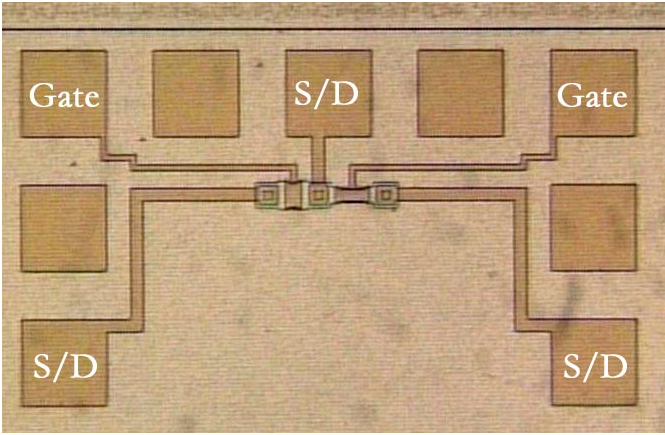

In [3]:
# logic gates
fig("vlsi-gate")

A breakthrough in the 1970's was the development of the integrated circuit.
This allowed large numbers of electronic elements to be "printed" photographically
onto a single substrate. However, these techniques are increasingly hitting their limits.

Another problem with VLSI is that it is not very robust; a single error can render
a chip unusable.



(question)

Do you know how a field effect transistor works?

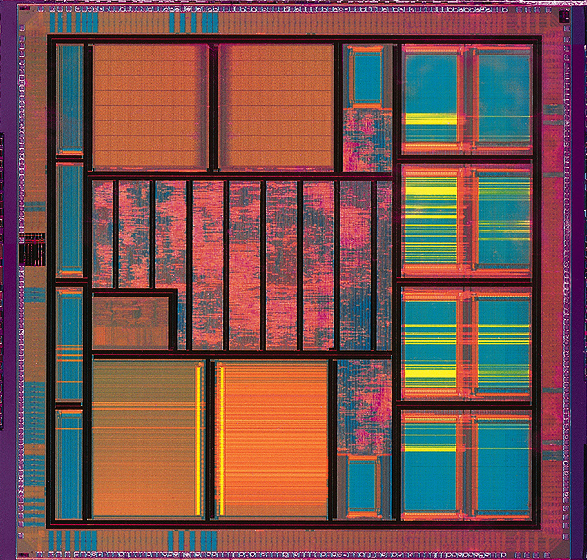

In [4]:
# integrated circuits
fig("vlsi")

We abstract and design digital circuits in terms of gates and circuit diagrams.
In such circuit diagrams, we simplify the analog operation of the gates and assume
that they are purely digital. We also eliminate any information about the location
of gates in the final device.



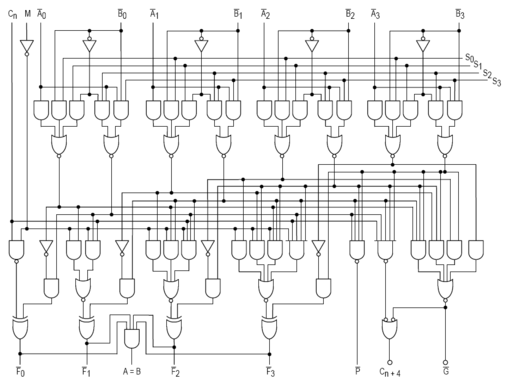

In [5]:
# logic circuit
fig("vlsi-logic")

In the design of large circuits, we often think in terms of block
diagrams and larger interconnections, instead of gates and wires.



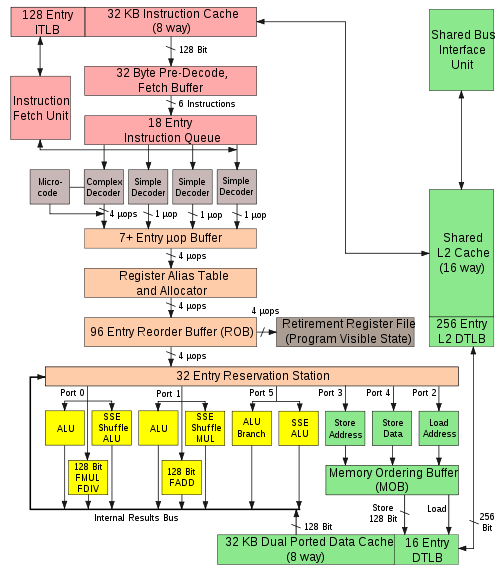

In [6]:
# block diagram
fig("vlsi-block")

The highest level at which we describe digital systems is in terms of
software. This abstracts away even more details of the hardware.



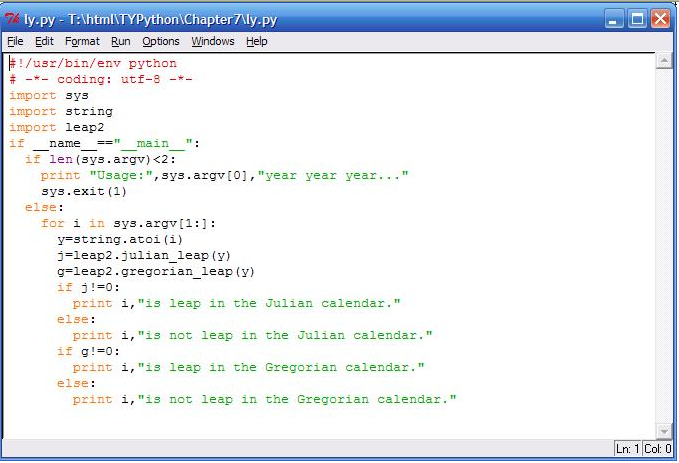

In [7]:
# high-level language
fig("vlsi-software")

(levels of description)

In summary, we describe digital systems at various levels:

- transistor level
- gate level
- circuit level
- block diagram level
- software level


# Neurons, Neural Networks, Brains

I'll be talking about neurons, neural hardware, and neural circuits.

Don't treat this just as a biology lesson, think about it as a computer scientist given a new kind of computer:

- How would I build a reliable computer out of this?
- How does parallelism work in this kind of hardware?
- How can I map algorithms onto this hardware?
- How does synchronization work?
- Why does it use so little power?

etc.

The computational elements of brains and nervous systems (i.e., what you think with) are _neurons_. Neurons are fairly standard cells in many ways, much like skin cells or stomach cells or many other cells in your body.
Most importantly, they are surrounded by a _cell membrane_ and contain a _cell nucleus_.

Neurons have an unusual shape that allows them to make lots of connections with other cells, and they are able to sense and release specific chemicals (_neurotransmitters_), as well as propagate electrical signals.



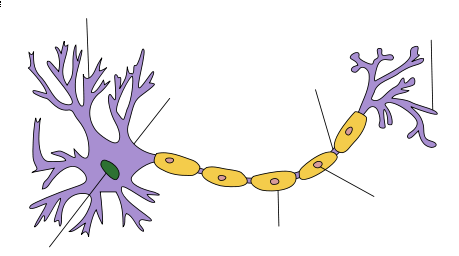

In [8]:
# neuron
fig("neuron-simple")

For comparison, here is a neuron on a VLSI chip.



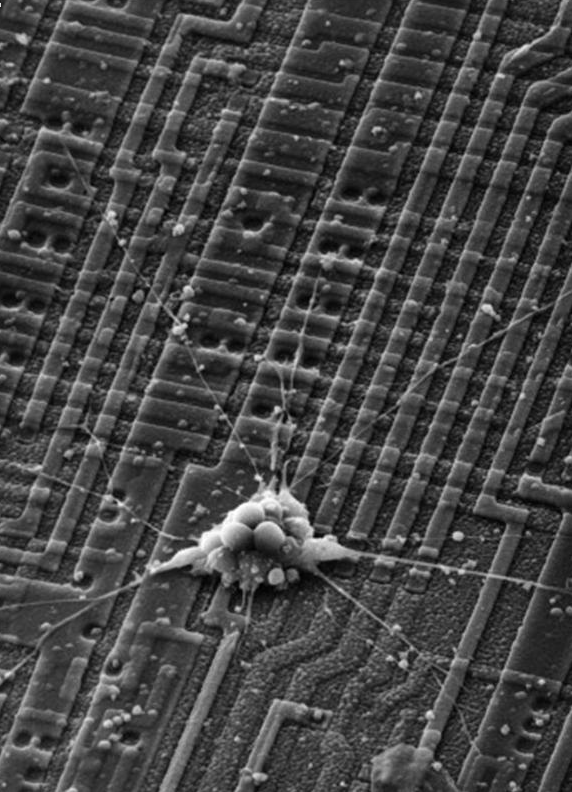

In [9]:
# neuron on chip
fig("neuron-on-chip")

This is a _motor neuron_, a neuron that is specialized for sending signals to muscles. It is growing on a layer of _glial cells_. Glial cells are cells that nourish and support neurons, and may have other functions as well.



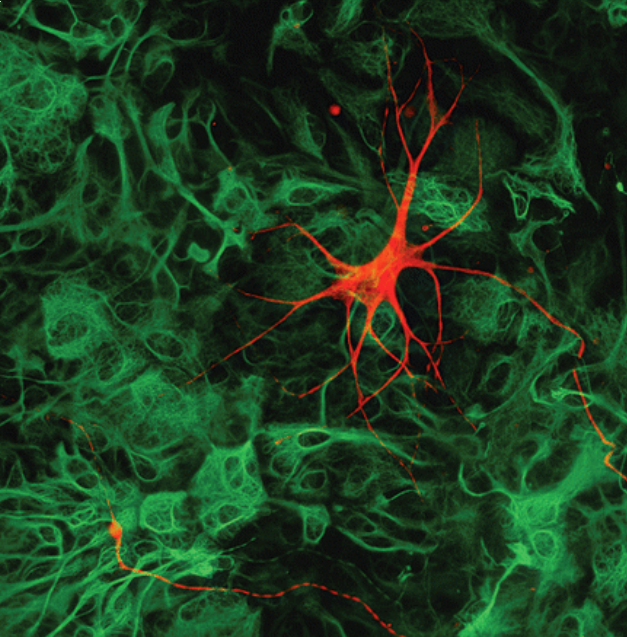

In [10]:
# motor neuron
fig("motor-neuron")

Many animals have fairly simple neural circuits with a fixed wiring diagram. That is, every animal in that species has the same number of neurons with the same connections. These circuits can be reconstructed and understood. Some of these circuits mediate reflexes or more complex behaviors like swimming.



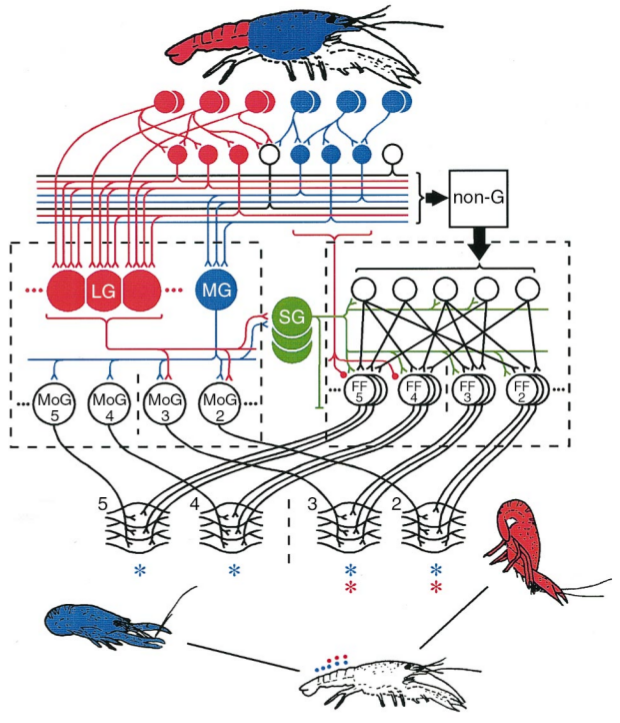

In [11]:
# neural circuit
fig("neural-circuit")

Most wiring in higher animals is random and adaptive. For example, the precise mapping between the back of the eyes and the brain (_retinotopic maps_) is established through the brain measuring signal correlations during development. This kind of approach makes neural systems very robust. It is used in some areas in computer science (e.g., networking), but not yet widespread at the level of processors or algorithms.



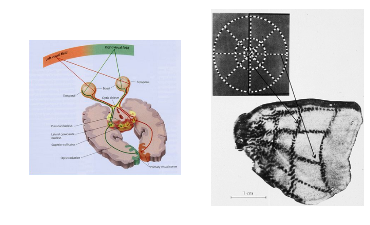

In [12]:
# retinotopic maps: random wiring + learning
figs("visual-pathway","retinotopy")

As for electronic devices, we can try to build functional block diagrams for neural systems.
Each of these blocks corresponds to an identifiable region of the brain.
The functions of these blocks are determined experimentally by: (1) determining inputs/outputs, (2) directly measuring activity in response to inputs, and (3) observing deficits in response to lesions.



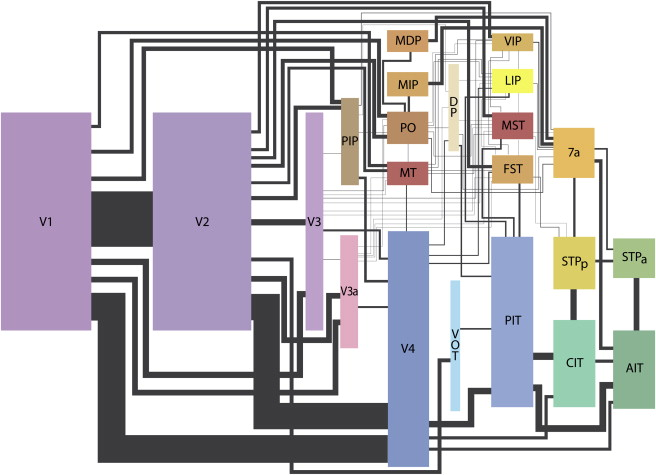

In [13]:
# neural block diagram (macaque monkey)
fig("macaque")

The high-level functions (analogous to "algorithms") of neural circuits still are largely unknown. There are many proposals, but if they were complete enough, they would allow us to build systems that show brain-like performance, and nobody has been able to do that.



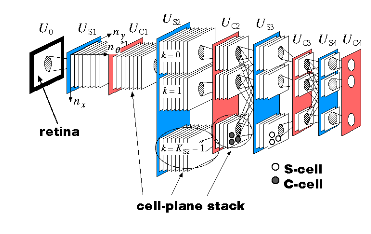

In [14]:
# neural software (?)
figs("neocognitron")

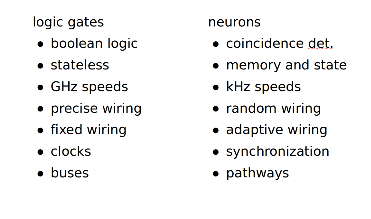

In [15]:
figs("neurons-vs-gates")

computer-science questions:

- can we emulate neurons with logic gates?
- can we emulate logic gates with neurons?
- what kinds of complexity statements can we make?
- how do real neurons deal with noise, error, failure?
- how does adaptation / learning work?

# The Neuron

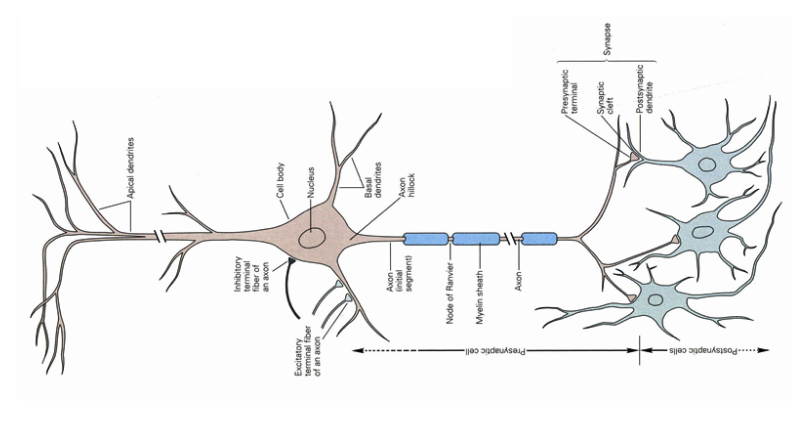

In [16]:
# schematic neuron morphology
fig("neuron-r")

Neurons are very small, self-contained "bags of salt water".
That is, they have a well-defined inside and a well-defined outside.
Despite their complicated shape, they are "topologically equivalent" to a balloon.
Think of a latex glove and its fingers that's been tied shut.

Neurons conduct signals.
These signals are partially electric and partially chemical in nature.
Signals travel at around 10 m/s

- Signals are conducted _passively_ (in an electrical sense) within dendrites.
- Dendritic signals are _analog_ (they are additive).
- Depending on the strength of the dendritic signal, the _trigger zone_ is triggered.
- Signals are conducted _actively_ within axons (as _action potentials_).
- Axonal signals are _all-or-nothing_ (binary) and short lived.
- Axonal signals are called _spikes_ and _action potentials_.

Note that normally, the dendrites are on one side of the cell body, the trigger zone is at the root of the cell body where the axon connects, and the axons is a single process coming out of the cell body.

However, there are other arrangements, although the function is always the same.

(neurons are complex "organisms")

Although it's tempting to think of a neuron as "just a wire", they are every bit as complex as many single celled organisms:

[amoeba feeding](http://www.youtube.com/watch?v=pvOz4V699gk)

[synapse formation](http://www.youtube.com/watch?v=Gb0oTDQJtIU)


The following image summarizes information transmission by a single neuron, from a sensor (a stretch sensor) to a synaptic terminal, and illustrates the electrical signals (we will look at this in more detail later). Note that the cell body is located after the trigger zone in this case.



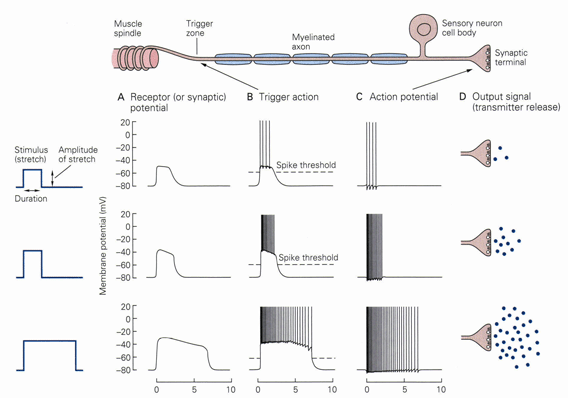

In [17]:
# signal-to-terminal
fig("neuron-single-signal")

The following image gives some idea of the wide variety of neurons found in animals.



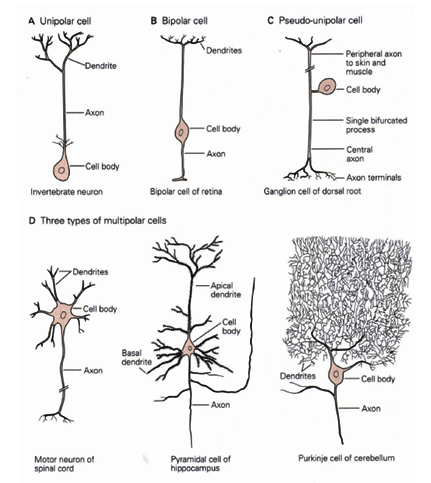

In [18]:
# wide variety of neurons
fig("neuron-variety")

Despite their different appearances, neurons all have the same basic structure:

- there is some sort of input, either from a sensor or from other neurons
- there is some kind of electrical integration at the cell body
- a resulting electro-chemical signal is generated and passed down the axon
- the terminal of the neuron releases substances to an effector

Usually, neurons connect to other neurons via synapses. But neurons can also release substances directly into the brain, into the blood, or connect to muscles to activate muscles.

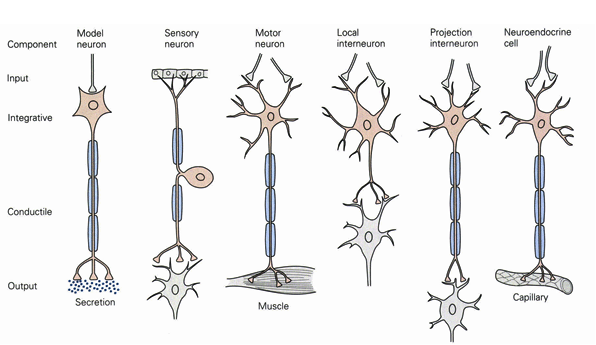

In [19]:
# equivalence of different neurons
fig("neuron-equivalence")

# The Synapse

The connections between neurons are where much of the computation happens. They can appear in various locations. The location of a synapse contributes strongly to its function. Most of these synapse types are not considered in mathematical models of neural networks, although they are likely very important.



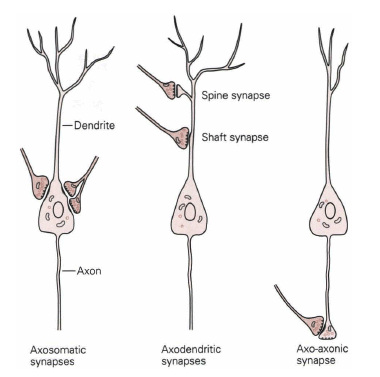

In [20]:
# types of synapses
fig("synapse-types")

(synapses)

Transmission from one neuron to another can happen via _chemical synapses_ or _electrical synapses_.

Chemical synapses are more common and responsible for most computation in the brain.

In chemical synapses, the two neurons are electrically isolated. They exchange information via chemical signals.

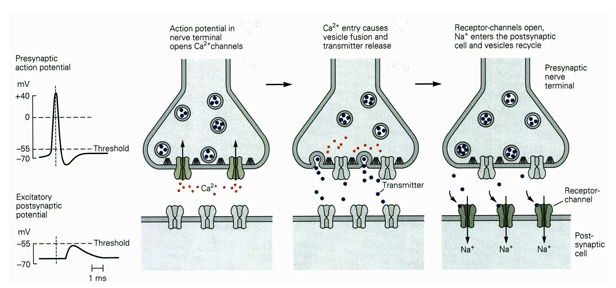

In [21]:
# transission at chemical synapses
fig("synaptic-transmission")

(chemical synapse function)

Chemical signals are sent as follows:

- an electrical signal travels down the axon and arrives at the _presynaptic terminal_
- the electrical signal causes the opening of presynaptic calcium channels
- the influx of calcium causes small containers (_vesicles_) to fuse with the external membrane
- by fusing, the vesicles release their contents (_neurotransmitters_) into the synaptic cleft
- the substances (_neurotransmitters_) bind to receptors (_neuroreceptors_) on the membrane of the _postsynaptic cell_
- the neuroreceptors are usually _channels_ that open up or close in response to the neurotransmitters
- by opening/closing, they let in/out ions, and this flux in ions causes voltage changes in the postsynaptic cell

Note that real synapses often look quite different from the diagrams, given that neural tissue is densely packed.



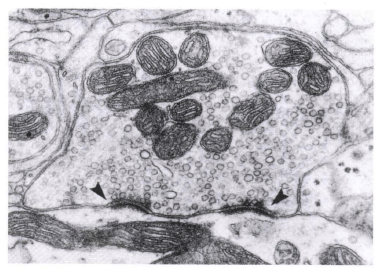

In [22]:
# real synapse
fig("synaptic-cleft")

(Neurotransmitters and Receptors)

- there are hundreds of neurotransmitters and receptors
- they are highly specific for each other and for different functions
- learning and memory are mediated by changes in concentrations of these receptors
- long term learning is also mediated through creation or destruction of synapses (rewiring)
- drugs (both legal and illegal) target many of these channels and neurotransmitters

(Drugs)

- LSD – serotonin receptor agonist
- opiates – opioid receptor agonists
- phenylephrine – adrenergic agonist
- beta blocker – adrenergic antagonist
- dextromethorphan – NMDA rec. antagonist
- PCP – NMDA receptor antagonist
- cannabis – cannabinoid receptor agonist

The simple chemical synapse described above illustrates a common type of receptor, a direct gating channel. However, many synaptic computations likely involve indirect gating. Each of these gating types implies different kinds of time constants and possible state transitions.



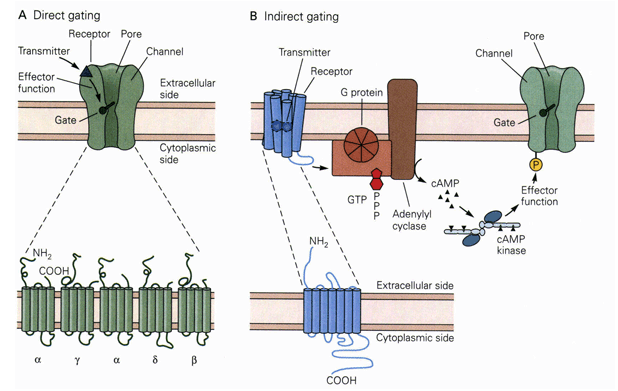

In [30]:
# receptor types
fig("receptor-types")

# Simple Circuits

Let's look at some simple examples of neural circuits. Note the use of an inhibitory interneuron to disable opposing muscle action (which might be harmful).



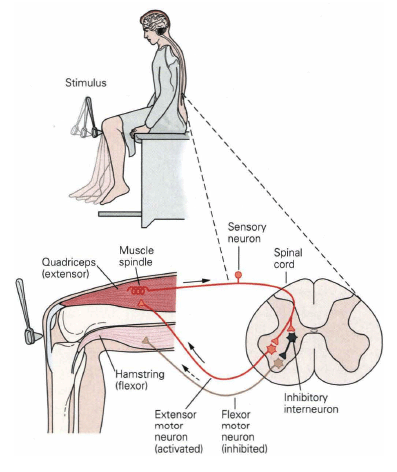

In [24]:
# reflex arc - a simple neural circuit
fig("reflex-arc")

The reflex arc illustrates nicely the entire sequence of signal transmission steps.



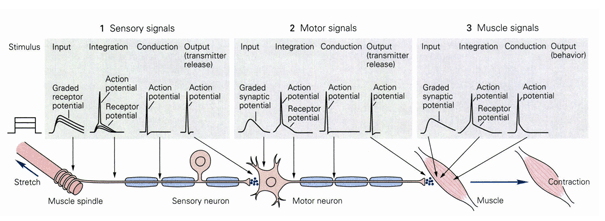

In [25]:
# reflex arc signals
fig("reflex-arc-signals")

Here is a schematic diagram of two simple circuits that govern the proper activation of muscle fibers.



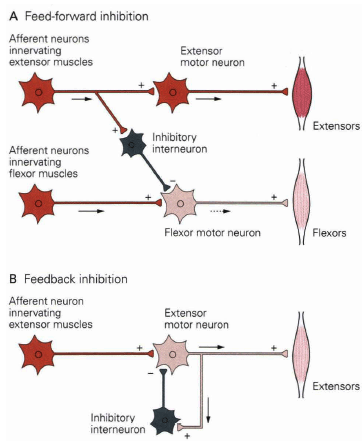

In [26]:
# neural circuits
fig("neural-circuits")

(common neural circuit types)

Neural circuits behave a bit like electrical circuits.
We distinguish between:

- feedforward connections
- feedback / recurrent connections
- excitatory connections
- inhibitory connections

# Synaptic Integration

(synaptic integration)

- recall that action potentials are spikes
- spikes trigger the release of neurotransmitters at synapses
- neurotransmitters generate excitatory or inhibitory electrical signals
- these signals (somtimes) generate more action potentials

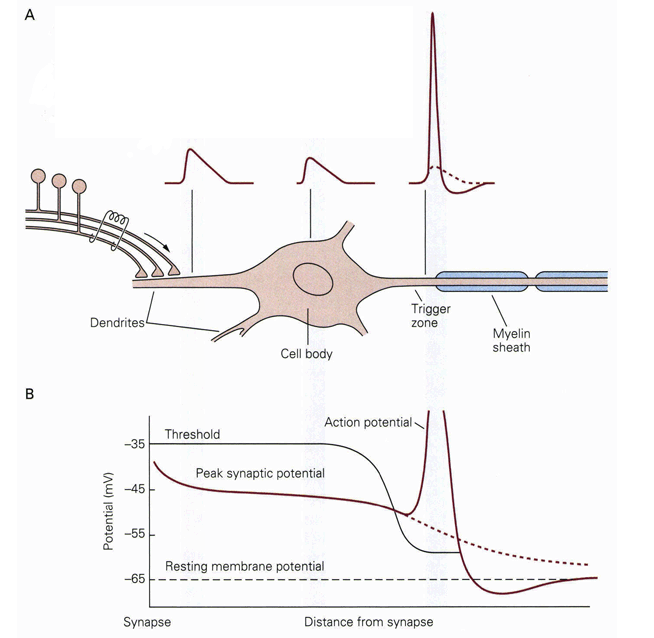

In [27]:
fig("synaptic-integration")

(conditions for action potential)

Under what circumstances does synaptic activity generate an action potential?

- a single excitatory input may be sufficient ("OR" gate)
- many excitatory inputs may be required ("AND" gate)
- inhibitory inputs are like negations ("NOT" gate)
- responses are graded and additive
- the strength of a response may be modified over time through learning

(synaptic summation)

From the physical structure of neurons, there are two primary kinds of summation:

- temporal summation: closely spaced inputs may push a neuron over its threshold
- spatial summation: more inputs and inputs closer to the trigger zone are more likely to push a neuron over its threshold

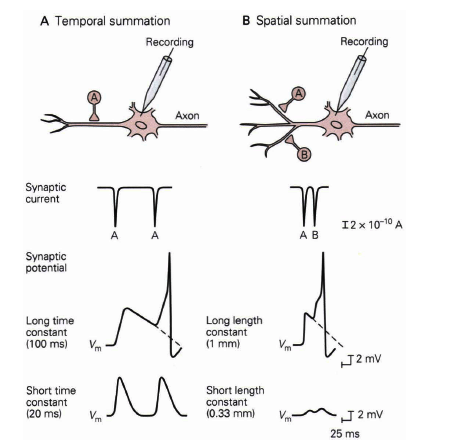

In [28]:
# synaptic summation
fig("synaptic-summation")

Even if they are triggered the same way, many neurons still show very different activation patterns. These patterns are governed by other factors.



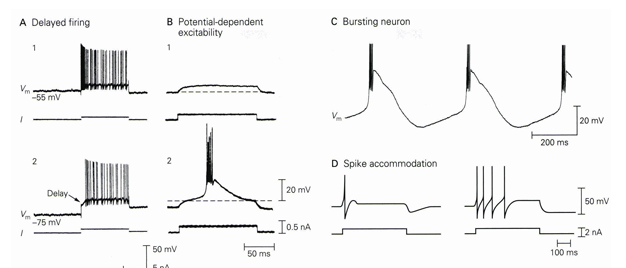

In [29]:
# variability of response
fig("variability-of-response")